# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [10]:
df = pd.read_csv('/content/drive/My Drive/Work/insurance .csv')

In [19]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,sex_LabelEncoder,smoker_LabelEncoder,region_LabelEncoder
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_LabelEncoder', 'smoker_LabelEncoder', 'region_LabelEncoder'],
      dtype='object')

In [21]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64
sex_LabelEncoder,int64
smoker_LabelEncoder,int64
region_LabelEncoder,int64


In [22]:
le = LabelEncoder()
df['sex_LabelEncoder'] = le.fit_transform(df['sex'])
df['smoker_LabelEncoder'] = le.fit_transform(df['smoker'])
df['region_LabelEncoder'] = le.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges,sex_LabelEncoder,smoker_LabelEncoder,region_LabelEncoder
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [23]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
sex_LabelEncoder,0
smoker_LabelEncoder,0
region_LabelEncoder,0


## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


<Axes: xlabel='age'>

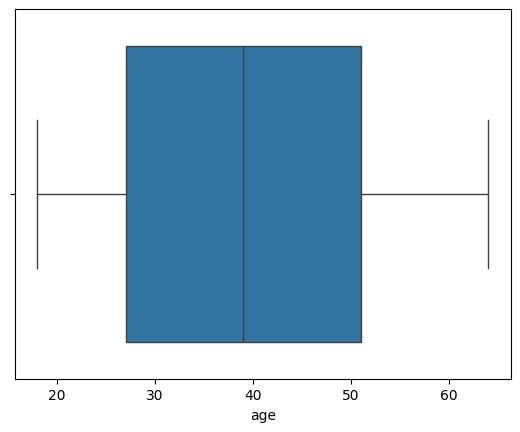

In [24]:
# age

sns.boxplot(data=df,x='age')

In [ ]:
# Observation
# The spread of the data is even on both sides of the median
# there are no outliers

<Axes: xlabel='sex', ylabel='count'>

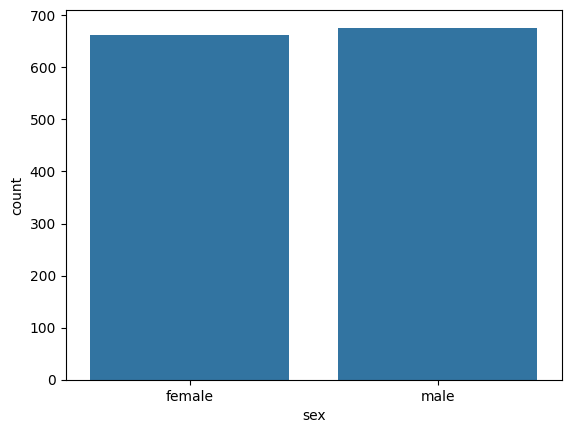

In [25]:
# sex

sns.countplot(data=df,x='sex')

In [ ]:
# Observation
# The distribution of male and female are equal in this data
# there is no imbalance in this data

<Axes: xlabel='bmi'>

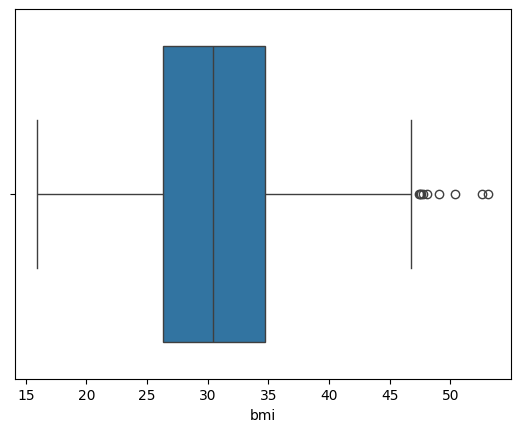

In [26]:
# bmi

sns.boxplot(data=df,x='bmi')

In [ ]:
# Observation
# Most of the people in the data have the bmi range between 26 to 35
# there are few outliers after the value 47 on the right side
# In this the median is approx 31, the min bmi is 15 and the max bmi is 47
# this is slightly right skewed

<Axes: xlabel='children', ylabel='count'>

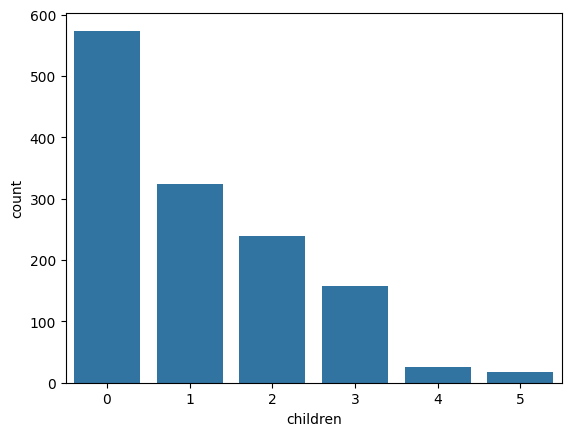

In [27]:
# children

sns.countplot(data=df,x='children')

In [ ]:
# Observation
# Among the total number of persons in the data approximately 580 members don't have children
# About 310 members have only one child ,240 members of 2 children and other has 3-5 children
# We can say that most of the people in the data have no children

<Axes: xlabel='smoker', ylabel='count'>

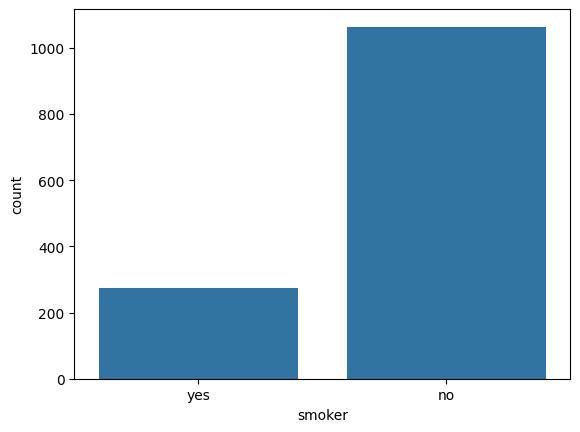

In [28]:
# smoker

sns.countplot(data=df,x='smoker')

In [ ]:
# Odesrvations
# Among the data more number of people are non smokers that is approximately 1100
# The number of persons who are smokers are  approx 250
# We can say that the data contains more number of non smokers

<Axes: xlabel='region', ylabel='count'>

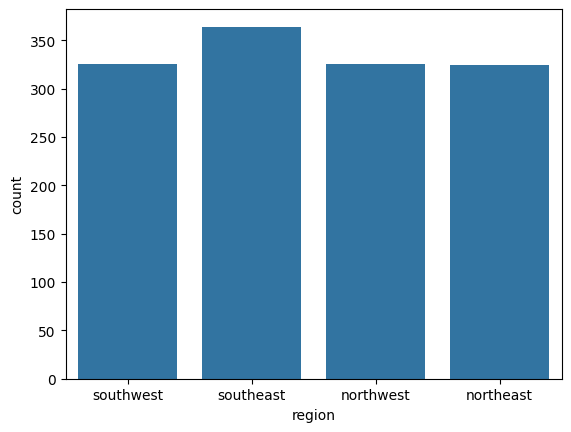

In [29]:
# Region

sns.countplot(data=df,x='region')

In [ ]:
# Observations
# The data contains slightly more number of people from southeast region
# Other 3 regions has almost same number of people in the data

### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

<Axes: xlabel='age', ylabel='charges'>

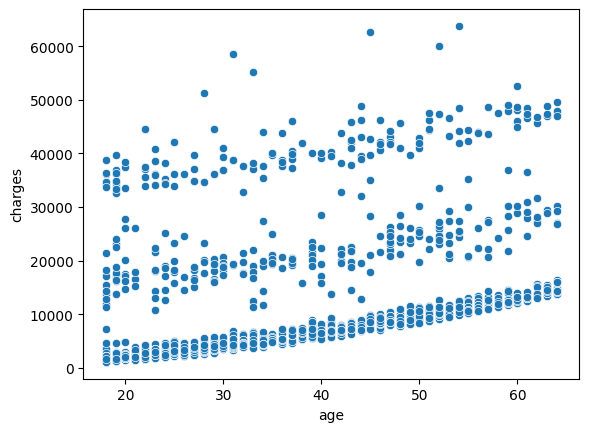

In [30]:
# Age VS Charges

sns.scatterplot(data=df,x='age',y='charges')

In [ ]:
# Observation
# People of different age has different charges while the age increase the charges are increased
# We can say that age is directly proportional to charges
# We also have some outliers

<Axes: xlabel='sex', ylabel='charges'>

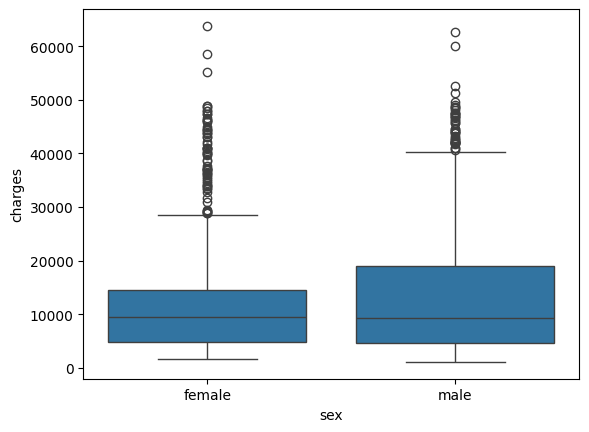

In [31]:
# Sex VS Charges

sns.boxplot(data=df,x='sex',y='charges')

In [ ]:
# Obsrvation
# Males have slightly higher charges compared to females
# There are outiers in both male and female which are with very higher charges
# There is no big difference in charges for male and female

<Axes: xlabel='bmi', ylabel='charges'>

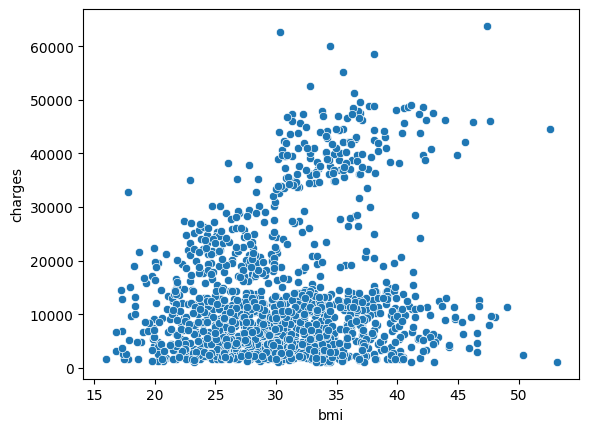

In [32]:
# bmi VS Charges

sns.scatterplot(data=df,x='bmi',y='charges')

In [33]:
# Observations
# In this plot we can say that there is no correct relationship between the bmi and charges
# We can say that people with both high bmi and high charges those are outliers
# we cannot say that people with higher bmi will have higher charges

<Axes: xlabel='children', ylabel='charges'>

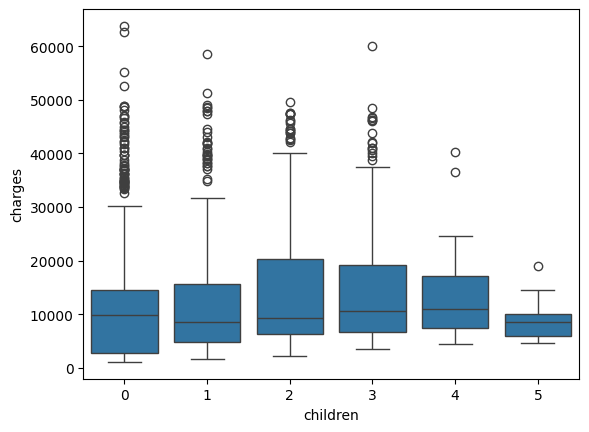

In [34]:
#children vs charges

sns.boxplot(data=df,x='children',y='charges')

In [ ]:
# Observations
# people with 0 to 3 children have higer charges
# people with 4 or 5 children have slightl lower insurance chaarges
# higher charges doesnot depend on number of children

<Axes: xlabel='smoker', ylabel='charges'>

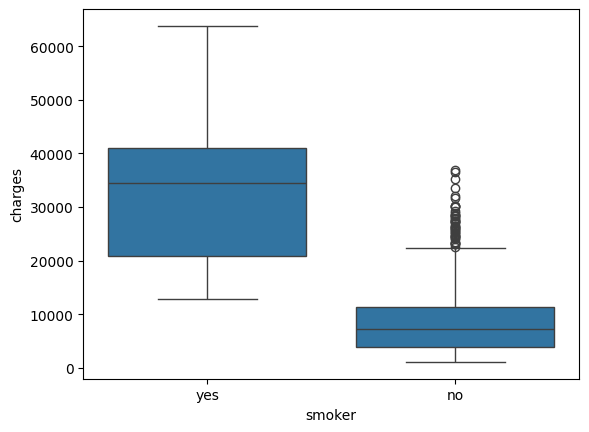

In [35]:
# smoker vs charges

sns.boxplot(data=df,x='smoker',y='charges')

In [36]:
# Observation
# charges for smokers lie between 10k to 60k and for non smokers it is from 2k to 20k approx
# we can clearly say that charges are high when the people are smokers and low when the people are non smokers
# there are outliers for non smokers with high charges

<Axes: xlabel='region', ylabel='charges'>

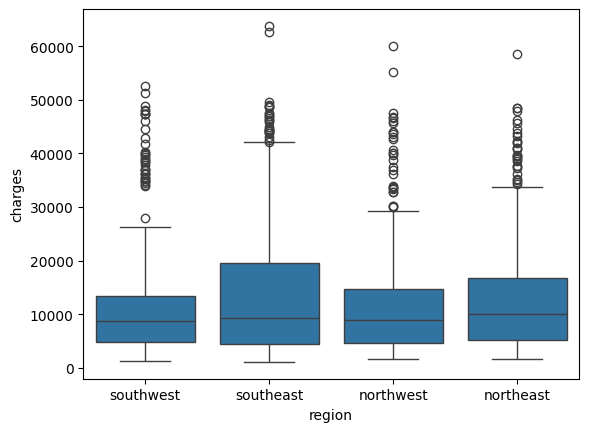

In [37]:
#  region vs charges

sns.boxplot(data=df,x='region',y='charges')

In [ ]:
# Observation
# There is no big difference in charges based on region
# outliers are present in all the regions

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

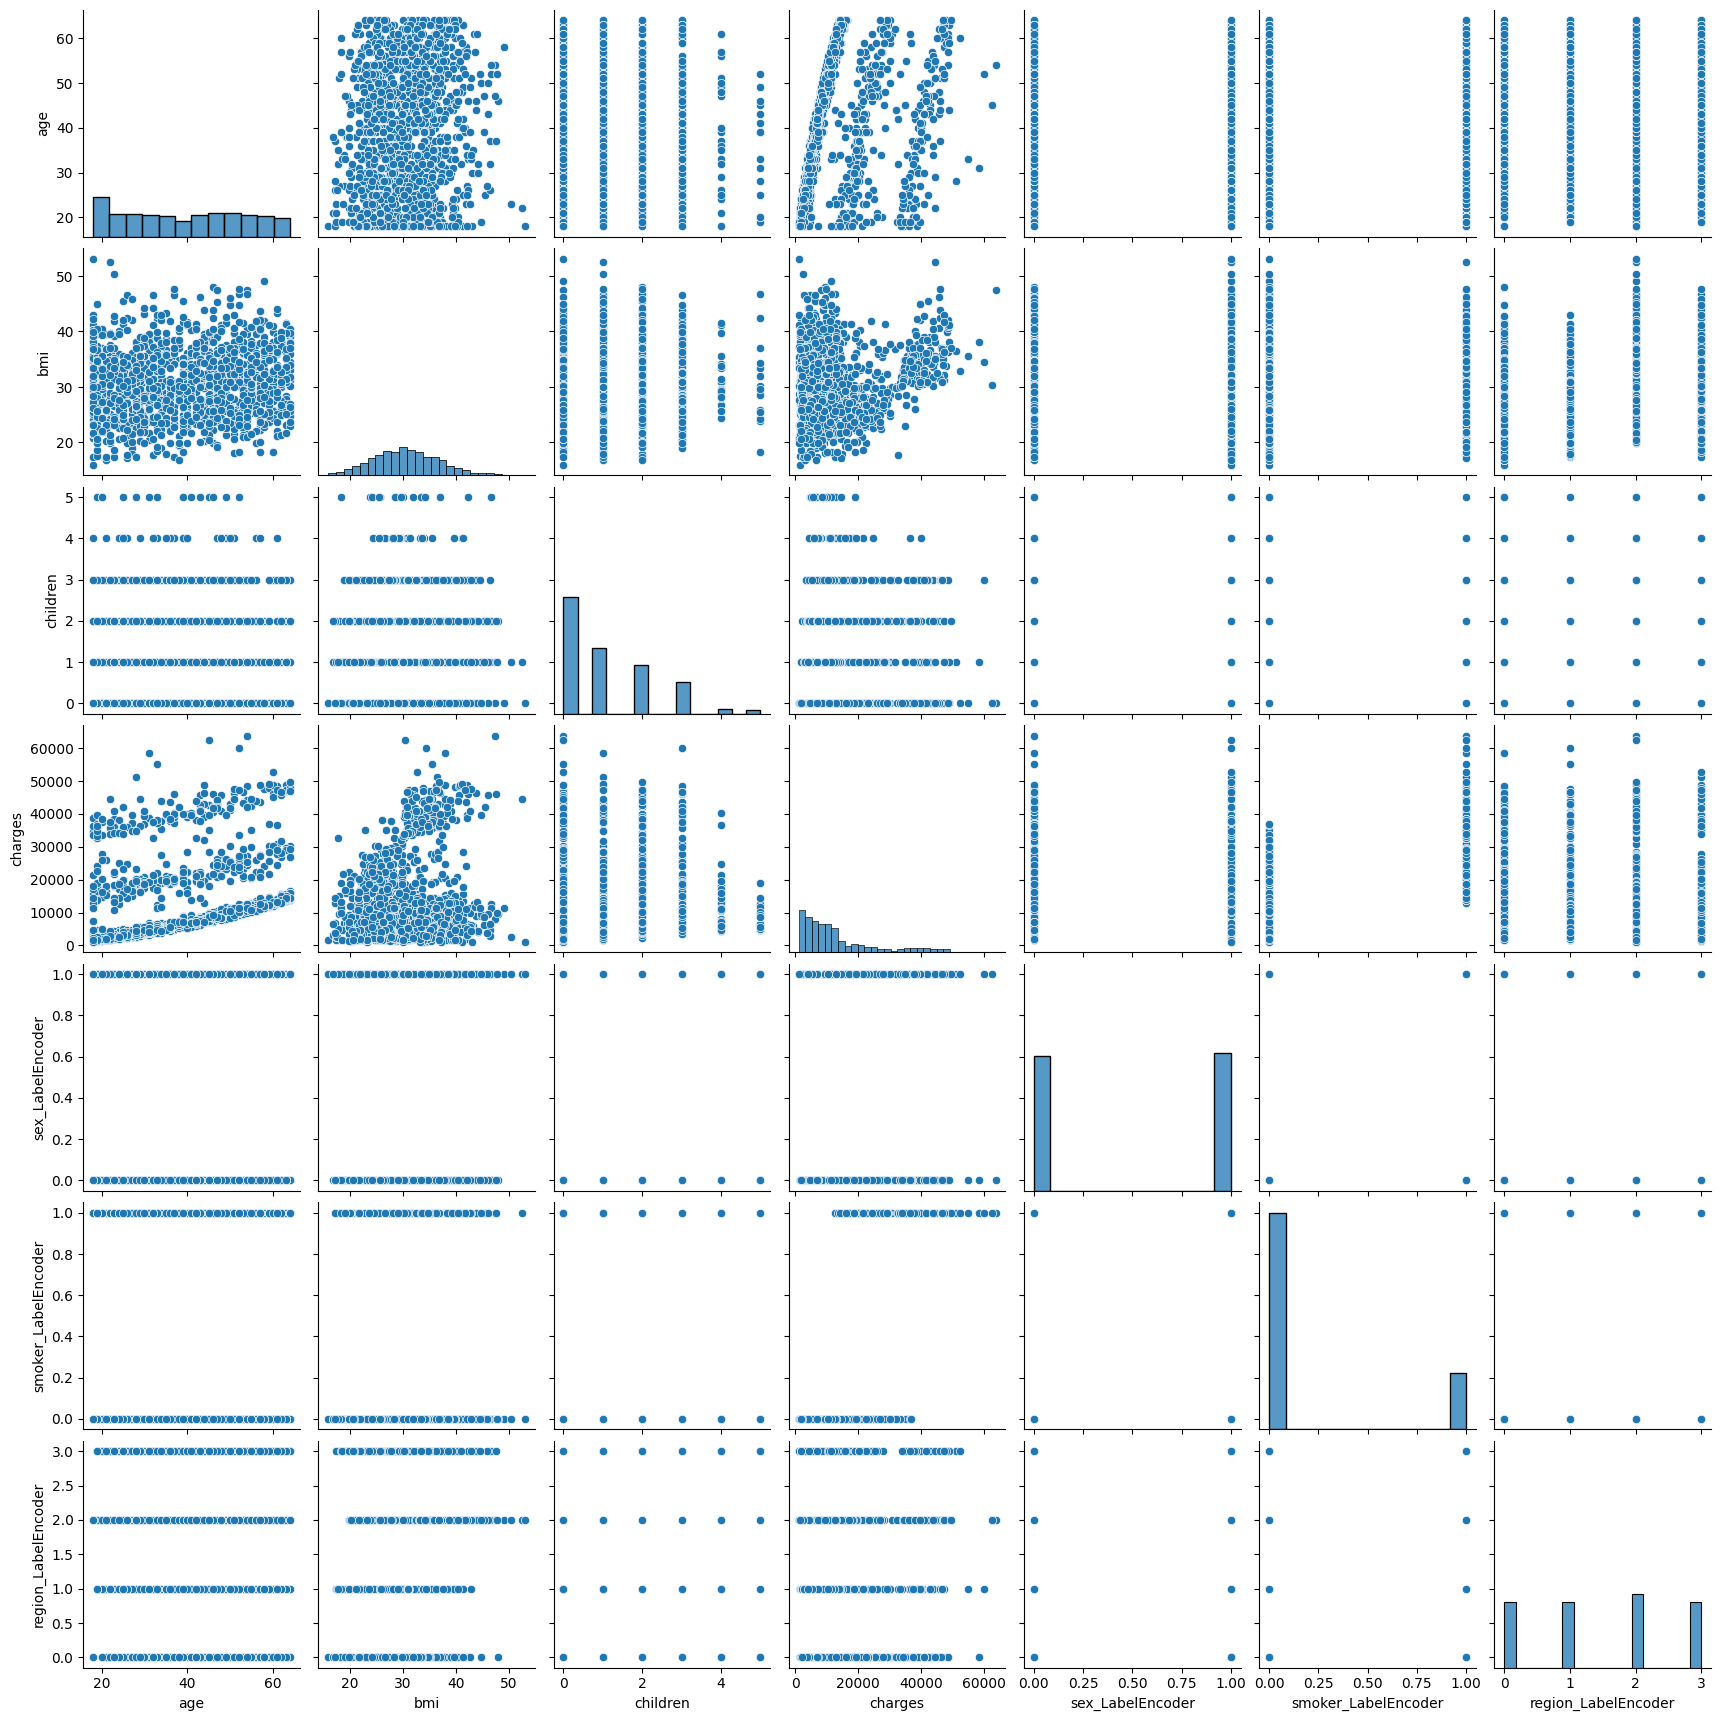

Observation: The pairplot shows tha strong linear relationship with age, smoker and  bmi and no relationship with others 


In [38]:
sns.pairplot(df)
plt.show()
print("Observation: The pairplot shows tha strong linear relationship with age, smoker and  bmi and no relationship with others ")

### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

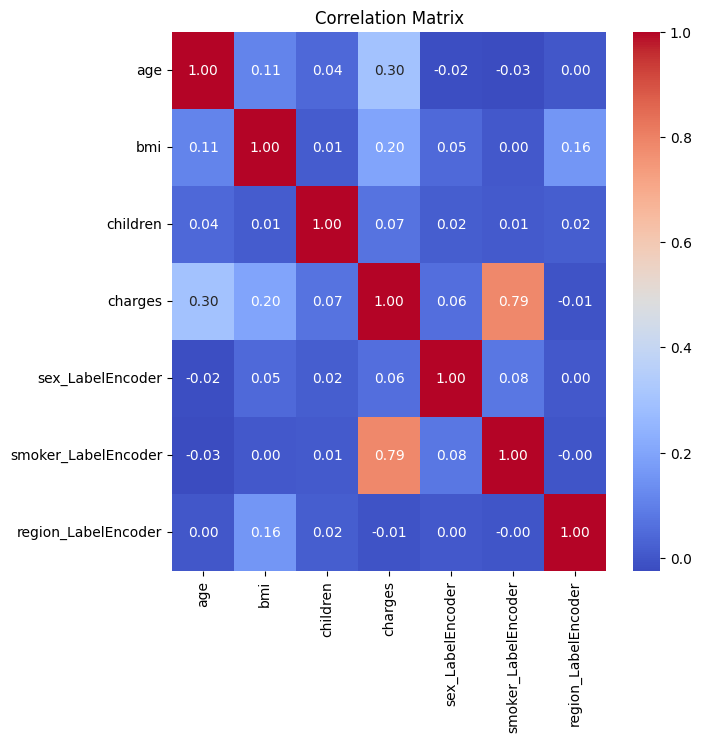

Observation:The heatmap reveals that the charges have the strong correlation with age and  smoker and weak correlation with region and children


In [39]:
plt.figure(figsize=(7,7))
sns.heatmap(df[['age', 'bmi','children','charges','sex_LabelEncoder','smoker_LabelEncoder','region_LabelEncoder']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print("Observation:The heatmap reveals that the charges have the strong correlation with age and  smoker and weak correlation with region and children")

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [40]:
X = df[['age','bmi','children','sex_LabelEncoder','smoker_LabelEncoder','region_LabelEncoder']]
y = df['charges']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.7422571320172101, 0.7694415927057693)

In [46]:
def adjusted_r2(r2, n, k):
    """Calculate the adjusted R²."""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


In [47]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

Coefficients: [  261.62568984   344.54483066   424.37016596   109.64719595
 23620.80252148  -326.46262527]
Intercept: -12364.391322279225


### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [48]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])

In [49]:
print(f"\nTraining Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")



Training Performance:
Mean Absolute Error (MAE): $4251.53
Root Mean Squared Error (RMSE): $6144.20
R-squared (R²): 0.74
Adjusted R-squared (Adj. R²): 0.74


In [50]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])

In [51]:
print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Test Performance:
Mean Absolute Error (MAE): $4155.24
Root Mean Squared Error (RMSE): $5814.25
R-squared (R²): 0.77
Adjusted R-squared (Adj. R²): 0.77


### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---

**Mean Square Error:** The models prediction by aprrox $41,68.50 from the actual valueIt is the measure of average absolute error inmodel prediction.

**Root Mean Square Error **: RMSE is higher than MAE which indicates that there are larger errors

**R-Squared**: This means 77% of the model explained by the model.The model is reliable but the model is not perfect

**Adjusted r-squared**: It provides more accurate measure of goodness of fit we cansay that the model is not in underfit or overfit

The model indicates that it is good accuracy that the predictions are very close.The values in both training and testing are consistentso we can say that the model is not overfit


## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

- Smoking feature is more impact in insurance charges . Smokers have high charges than non smokers due to the health risk
- Age is also show more impact in chagres due to increase in age will lead to health risks
-BMI is not a good feature for charges but there are some outliers where it has high bmi and higher insurance charges
-Children and Region has a very less impact on charges
-In sex both male and female have same charges so it was not a good feature to predict charges

**Smoking** : It is a very good feature to predict because the charges for smokers are likely high due the health risk so we can easil predict the charges are more for smokers and less for non smokers

- Smoking feature is more impact in insurance charges . Smokers have high charges than non smokers due to the health risk
- Age is also show more impact in chagres due to increase in age will lead to health risks
-BMI is not a good feature for charges but there are some outliers where it has high bmi and higher insurance charges
-Children and Region has a very less impact on charges
-In sex both male and female have same charges so it was not a good feature to predict charges

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

- It doesnot handle for high or low values

- It cann't catch complex patterns in the data

- The features shouldnot be too close to each other

- By using cross validation we can make the model work better for better accuracy

- We can also use regulariztion to reduce affect of less important features

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 60**

---